# MNIST Computer Vision Project

Welcome to the first deep learning project! In this project, you will build your first neural network and use it to classify handwritten digits. We will use the famous [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) to build our model. The dataset contains 60,000 training images and 10,000 testing images. The images are grayscale and 28x28 pixels in size.

The MNIST dataset is a great dataset to get started with deep learning and computer vision. It is often used as a benchmark dataset to test new machine learning algorithms. The dataset is relatively small and easy to work with, which makes it a great dataset for beginners.

But first, take a moment to think: how would you go about building an algorithm to classify handwritten digits? Can you even do this in code?

These are the types of problems that machine learning can solve because the patterns are too complex for us to write code to solve them. Instead, we can use machine learning to learn the patterns from the data.

## Learning Objectives

The goals of this project are:

1. Get comfortable with the fundamental components of a neural network by building a simple neural network from scratch.
2. Show you how to use the functions and classes provided by the PyTorch library to build and train the same neural network.
3. (Optional) Implement a more-modern convolutional neural network (CNN) using PyTorch to classify handwritten digits.

3Brown1Blue has a great series of videos on neural networks and deep learning. Here are some of the videos that you might find helpful to watch before starting this project:
- [Neural network structure](https://youtu.be/aircAruvnKk?si=37vx3QGW1wk5sz7I)
- [Gradient descent](https://youtu.be/IHZwWFHWa-w?si=JZgr3wXDsPutZka5)
- [Backpropagation](https://youtu.be/Ilg3gGewQ5U?si=G4CRL-2oWd1DiCyw)

### The 3Blue1Brown Multi-Layer Perceptron (MLP) Neural Network

We're going to build just a simple multi-layer perceptron (MLP) neural network.

The input is a 28x28 image of a digit which is flattened into a 1D array of 784 pixels. This will be the input layer of the network.

We're going to use two hidden layers with 16 neurons each with 10 output neurons--one for each digit (class).

Just like the video, we're going to use the sigmoid activation function (easier to calculate a derivative for backpropagation) for the hidden layers and will output the raw logits for the output layer (again, easier to calculate a derivative for backpropagation when there is no activation function).

\* Note: in practice, the ReLU (rectified linear unit) activation function is more common for hidden layers because it's faster to compute and doesn't have the vanishing gradient problem.

#### How Our Network Learns

Networks learn by adjusting the weights of the connections between neurons. The weights are initialized randomly.

The network makes a prediction by passing the input through the network and calculating the output. The output is compared to the actual output. The difference between the predicted output and the actual output is the loss.

We are using a cross-entropy loss function which is a good loss function for classification problems. The loss function is a measure of how well the network is doing.

Based on the loss function, we can update the weights of the network using the backpropagation algorithm. The backpropagation algorithm calculates the gradient of the loss function with respect to the weights and applies the negative gradient (gradient descent) to update the weights. Backpropogation is done using the chain rule of calculus.

The gradient descent algorithm is used to minimize the loss function, but it's not guaranteed to find the global minimum. It can only find a local minimum. The network will always converge to a local minimum, but it's not guaranteed to be the best one.

We use batches and stochastic gradient descent to speed up the process. The network is trained on a batch of data, and the weights are updated after each batch. This is faster than updating the weights after each data point. We will see the use of batches even in our numpy implementation!

## Let's Get Started!

The required libraries will be listed in the next cell for you to install if you don't have them already.

In [3]:
!pip install -q numpy torch torchvision matplotlib scikit-learn

In [4]:
from torchvision.datasets import MNIST

# Load the MNIST dataset from torchvision (train and test)
mnist = MNIST(root="data", train=True, download=True)
test_mnist = MNIST(root="data", train=False, download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## Instructions

Now that we have the data downloaded, we can start building our neural network. First, we need to define a function to normalize and flatten the data.

Flattening the data means converting the 28x28 image into a 1D array of 784 pixels. Linear layers in neural networks require 1D input, so we need to flatten the data before passing it to the network.

In [ ]:
import numpy as np


# Function to normalize and flatten the images
def normalize(images: np.ndarray) -> np.ndarray:
    return images


# Convert the images to normalized numpy arrays.
# The dataset objects contain data and target attributes.
X_train = normalize(mnist.data.numpy())
y_train = mnist.targets.numpy()
X_test = normalize(test_mnist.data.numpy())
y_test = test_mnist.targets.numpy()

## Instructions

Let's now visualize our data. We will plot a few images from the dataset to see what they look like. We will need to reshape the data back to 28x28 images before plotting them.

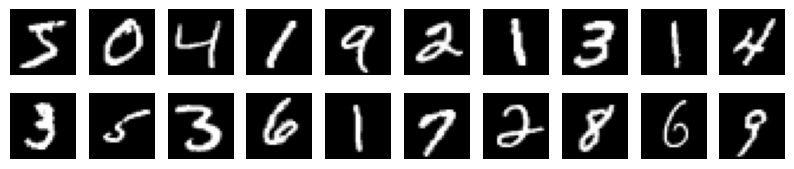

In [41]:
import matplotlib.pyplot as plt

# Plot the first 20 images of the training set.
fig, ax = plt.subplots(2, 10, figsize=(10, 2))

for i in range(20):
    ax[i // 10, i % 10].imshow(X_train[i].reshape(28, 28), cmap="gray")
    ax[i // 10, i % 10].axis("off")
plt.show()

## Reflection

These are the handwritten digits that we will be classifying. The images are grayscale and 28x28 pixels in size. The images are quite small, so it's hard to see the details. But the neural network will be able to learn the patterns from the data.

## Instructions

In the next cell, we will define the neural network class. This time we will be using exclusively numpy to build the neural network from scratch.

In the next cell:
1. Implement the `sigmoid` function to calculate the sigmoid activation function.
2. Implement the `sigmoid_derivative` function to calculate the derivative of the sigmoid activation function.
3. Implement the `forward` function to calculate the forward pass of the network.
    - Calculate the dot product of the input and the weights of the first layer.
    - Apply the sigmoid activation function to the output of the first layer.
    - Calculate the dot product of the output of the first layer and the weights of the second layer.
    - Apply the sigmoid activation function to the output of the second layer.
    - Calculate the dot product of the output of the second layer and the weights of the output layer.
    - Return the output of the output layer.
4. Implement backpropogation in the training loop to update the weights of the network.
    - Calculate the loss of the network using the cross-entropy loss function.
    - Calculate the gradient of the loss with respect to the weights of the output layer.
    - Calculate the gradient of the loss with respect to the weights of the second layer.
    - Calculate the gradient of the loss with respect to the weights of the first layer.
    - The provided code will update the weights of the network using the gradients calculated above.

In [ ]:
import numpy as np


# Define the model class
class MLPClassifier:
    def __init__(
        self,
        input_size: int,
        hidden_sizes: list[int],
        output_size: int,
        learning_rate: float = 0.1,
        batch_size: int = 32,
        epochs: int = 100,
    ):
        # Initialize hyperparameters
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.epochs = epochs

        # Initialize weights and biases for each layer
        self.weights_input_hidden1 = np.random.randn(input_size, hidden_sizes[0])
        self.biases_hidden1 = np.random.randn(hidden_sizes[0])

        self.weights_hidden1_hidden2 = np.random.randn(hidden_sizes[0], hidden_sizes[1])
        self.biases_hidden2 = np.random.randn(hidden_sizes[1])

        self.weights_hidden2_output = np.random.randn(hidden_sizes[1], output_size)
        self.biases_output = np.random.randn(output_size)

    def sigmoid(self, x: np.ndarray) -> np.ndarray:
        """
        Compute the sigmoid activation function.
        """
        return x

    def sigmoid_derivative(self, x):
        """
        Compute the derivative of the sigmoid function.
        """
        return x

    def forward(self, X: np.ndarray) -> np.ndarray:
        """
        Perform the forward pass through the network.
        """
        # First hidden layer with sigmoid activation
        self.hidden1_input: np.ndarray = 
        self.hidden1_output: np.ndarray = 

        # Second hidden layer with sigmoid activation
        self.hidden2_input: np.ndarray = 
        self.hidden2_output: np.ndarray = 

        # Output layer with raw logits
        output = 
        return output

    def train(
        self,
        X_train: np.ndarray,
        y_train: np.ndarray,
        X_test: np.ndarray,
        y_test: np.ndarray,
    ) -> None:
        for epoch in range(self.epochs):
            total_loss = 0
            # Shuffle the data at the start of each epoch
            indices = np.arange(len(X_train))
            np.random.shuffle(indices)
            X_train = X_train[indices]
            y_train = y_train[indices]

            # Iterate over each batch
            for start_idx in range(0, len(X_train), self.batch_size):
                end_idx = min(start_idx + self.batch_size, len(X_train))

                # Get the current batch
                X_batch = X_train[start_idx:end_idx]
                y_batch = y_train[start_idx:end_idx]

                # Forward pass for the batch
                output = self.forward(X_batch)  # Output is raw logits

                # Compute the cross-entropy loss directly from logits and labels (no one-hot encoding)
                log_probs = output - np.max(
                    output, axis=1, keepdims=True
                )  # Numerical stability
                log_probs -= np.log(np.sum(np.exp(log_probs), axis=1, keepdims=True))

                # Compute the negative log-likelihood loss
                loss = 

                # Accumulate the total loss for the epoch
                total_loss += loss

                # Backpropagation for cross-entropy loss with raw logits
                # Gradient of the output layer
                exp_log_probs = np.exp(log_probs)

                # Normalize the probabilities
                output_grad = exp_log_probs / np.sum(
                    exp_log_probs, axis=1, keepdims=True
                )

                # Subtract 1 from the true class to get the gradient
                output_grad[np.arange(len(y_batch)), y_batch] -= 1

                # Average the gradient over the batch
                output_grad /= self.batch_size

                # Gradient of the output layer weights and biases
                weights_hidden2_output_grad = 
                biases_output_grad = 

                # Gradient of the second hidden layer
                hidden2_grad: np.ndarray = 

                # Gradient of the second hidden layer weights and biases
                weights_hidden1_hidden2_grad = 
                biases_hidden2_grad = 

                # Gradient of the first hidden layer
                hidden1_grad: np.ndarray = 

                # Gradient of the first hidden layer weights and biases
                weights_input_hidden1_grad = 
                biases_hidden1_grad = 

                # Update the weights and biases using gradient descent
                self.weights_hidden2_output -= (
                    self.learning_rate * weights_hidden2_output_grad
                )
                self.biases_output -= self.learning_rate * biases_output_grad
                self.weights_hidden1_hidden2 -= (
                    self.learning_rate * weights_hidden1_hidden2_grad
                )
                self.biases_hidden2 -= self.learning_rate * biases_hidden2_grad
                self.weights_input_hidden1 -= (
                    self.learning_rate * weights_input_hidden1_grad
                )
                self.biases_hidden1 -= self.learning_rate * biases_hidden1_grad

            # Compute the accuracy on the test set
            predictions = self.forward(X_test)
            accuracy = np.mean(np.argmax(predictions, axis=1) == y_test)
            print(
                f"Epoch {epoch + 1}: Loss = {total_loss / X_train.shape[0]}, Accuracy = {accuracy}"
            )


# Define the model hyperparameters
input_size = X_train.shape[1]  # MNIST images are 28x28
hidden_sizes = [16, 16]  # Play with these to test different architectures
output_size = 10  # 10 classes for MNIST digits
learning_rate = 0.1
batch_size = 16
epochs = 100

# Instantiate the model
mlp = MLPClassifier(
    input_size, hidden_sizes, output_size, learning_rate, batch_size, epochs
)

# Train the model
mlp.train(X_train, y_train, X_test, y_test)

Epoch 1: Loss = 1.1324007797450468, Accuracy = 0.7805
Epoch 2: Loss = 0.5833253414610897, Accuracy = 0.8539
Epoch 3: Loss = 0.4512227393385984, Accuracy = 0.8767
Epoch 4: Loss = 0.39300356445053797, Accuracy = 0.8906
Epoch 5: Loss = 0.3577083364577714, Accuracy = 0.8953
Epoch 6: Loss = 0.3328011007138566, Accuracy = 0.9025
Epoch 7: Loss = 0.3142225087420694, Accuracy = 0.9065
Epoch 8: Loss = 0.2994177011398982, Accuracy = 0.9103
Epoch 9: Loss = 0.28614277814931877, Accuracy = 0.9139
Epoch 10: Loss = 0.27615260570417116, Accuracy = 0.9135
Epoch 11: Loss = 0.26517156963388283, Accuracy = 0.9192
Epoch 12: Loss = 0.25669231461522485, Accuracy = 0.92
Epoch 13: Loss = 0.24925299908400628, Accuracy = 0.9193
Epoch 14: Loss = 0.24159264498139804, Accuracy = 0.9229
Epoch 15: Loss = 0.23557640055032122, Accuracy = 0.9228
Epoch 16: Loss = 0.22920920872349937, Accuracy = 0.9228
Epoch 17: Loss = 0.22386872140477948, Accuracy = 0.9257
Epoch 18: Loss = 0.21888022188304906, Accuracy = 0.9249
Epoch 19: 

## Reflection

Wow! You've created your first neural network! After 100 epochs, I was seeing a loss of around 0.11 and an accuracy of around 93%--this is on-par with the accuracy of most MLPs on the MNIST dataset.

Did you try to implement without the batch processing? When I made the switch to batch processing, I was amazed at how much faster the network trained. It's a great way to speed up the training process.

## Instructions

Let's continue learning in the next cell by building the same network using PyTorch.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Set device to GPU if available (this will speed up the training)
device = torch.device(
    "cuda"
    if torch.cuda.is_available()
    else "mps" if torch.mps.is_available() else "cpu"
)
print(f"Using device: {device}")


class MLPClassifier(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(MLPClassifier, self).__init__()
        # Define three linear layers (denoted by fci for fully connected layer i)
        self.fc1 =  # Input layer to hidden layer 1
        self.fc2 =  # Hidden layer 1 to hidden layer 2
        self.fc3 =  # Hidden layer 2 to output layer

    def forward(self, x):
        # Apply activations

        # softmax is not needed from output layer, as CrossEntropyLoss already applies log_softmax internally
        
        return x


# Define the model hyperparameters
input_size = X_train.shape[1]  # MNIST images are 28x28
hidden_sizes = [16, 16]  # Play with these to test different architectures
output_size = 10  # 10 classes for MNIST digits
learning_rate = 0.1
batch_size = 16
epochs = 10

# Instantiate the model
model = MLPClassifier(input_size, hidden_sizes, output_size).to(device)

# Cross-entropy loss and SGD (stochastic gradient descent) optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Convert numpy arrays to torch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader for training and testing, don't shuffle test set
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Train the model
for epoch in range(epochs):
    # Set model to training mode (enables dropout, batch normalization, etc.)
    model.train()

    total_loss = 0
    for X_batch, y_batch in train_loader:
        # Move data to device
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Forward pass
        outputs = model(X_batch)

        # Compute loss
        loss = criterion(outputs, y_batch)
        total_loss += loss.item()

        # Reset gradients to zero before backpropagation
        optimizer.zero_grad()

        # Backward pass to compute gradients
        loss.backward()

        # Update weights and biases by taking a step with the optimizer
        optimizer.step()

    # Evaluate accuracy on the test set
    # Set model to evaluation mode (no gradients)
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            # Move data to device
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            # Forward pass
            outputs = model(X_batch)

            # Get predictions
            _, predicted = torch.max(outputs, 1)

            # Update counts
            total += y_batch.size(0)

            # No. of correct predictions
            correct += (predicted == y_batch).sum().item()

    accuracy = correct / total

    # Print loss and accuracy
    print(
        f"Epoch {epoch + 1}: Loss = {total_loss / len(train_loader.dataset)}, Accuracy = {accuracy}"
    )

Using device: mps
Epoch 1: Loss = 0.07364575096244613, Accuracy = 0.8792
Epoch 2: Loss = 0.023446675619172554, Accuracy = 0.9143
Epoch 3: Loss = 0.016995369993615894, Accuracy = 0.9294
Epoch 4: Loss = 0.014035712285758927, Accuracy = 0.9405
Epoch 5: Loss = 0.01243833715201666, Accuracy = 0.9401
Epoch 6: Loss = 0.011458401339454576, Accuracy = 0.9457
Epoch 7: Loss = 0.010786303604246738, Accuracy = 0.9438
Epoch 8: Loss = 0.010259002932781975, Accuracy = 0.9468
Epoch 9: Loss = 0.009790103892314559, Accuracy = 0.9494
Epoch 10: Loss = 0.00948074121157406, Accuracy = 0.9458


## Reflection

So much easier, right? PyTorch is a great library for building neural networks. It's easy to use and has a lot of built-in functions that make building neural networks a breeze.

I was also able to achieve a loss of around 0.009 and an accuracy of 94% after just 10 epochs. This is a great improvement over the numpy implementation.

This likely has to do with the optimization algorithm used by PyTorch. The stochastic gradient descent algorithm used by PyTorch is likely more sophisticated than the one I implemented in the numpy version.

### Why do we not need to define the backpropagation algorithm in PyTorch?

PyTorch uses automatic differentiation to calculate the gradients of the loss function with respect to the weights. This is done using the `backward()` function. 

PyTorch keeps track of the operations that are performed on the tensors by traversing the computational graph in reverse order. The gradients are then calculated using the chain rule of calculus and then used to update the weights of the network using the gradient descent algorithm.

## Instructions

If you want to continue learning, let's build a more-modern convolutional neural network (CNN) using PyTorch to classify handwritten digits.

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from torch.functional import F
import torch.nn as nn
import torch.optim as optim

# Set device
device = torch.device(
    "cuda"
    if torch.cuda.is_available()
    else "mps" if torch.backends.mps.is_available() else "cpu"
)
print(f"Using device: {device}")


class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()

        # Define the convolutional layers
        # The first convolutional layer takes 1 input channel (grayscale)
        # and produces 32 output channels using a 3x3 kernel
        # with a stride of 1 and padding of 1.

        # The second convolutional layer takes 32 input channels
        # and produces 64 output channels using a 3x3 kernel
        # with a stride of 1 and padding of 1.

        # The max pooling layer reduces the spatial dimensions by a factor of 2

        # Define the fully connected layers
        # The first fully connected layer takes 64 * 7 * 7 input features
        # (output of the second convolutional layer) and produces 128 output features

        # The second fully connected layer takes 128 input features
        # and produces 10 output features (one for each class)

        # In between the fully connected layers, we apply a ReLU activation
        # and dropout for regularization (to prevent overfitting)

    def forward(self, x):
        # Apply the first convolutional layer with ReLU and max pooling

        # Apply the second convolutional layer with ReLU and max pooling

        # Flatten the output of the convolutional layers

        # Apply the fully connected layers with ReLU and dropout

        # Apply the output layer
        return x


# Instantiate the model
cnn_model = CNNClassifier().to(device)

# Define the cross-entropy loss and Adam optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

# Convert numpy arrays to torch tensors and reshape for CNN input
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).view(-1, 1, 28, 28)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).view(-1, 1, 28, 28)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader for training and testing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Train the model
epochs = 10
for epoch in range(epochs):
    cnn_model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:

        # Move data to device
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Forward pass
        outputs = cnn_model(X_batch)

        # Compute loss
        loss = criterion(outputs, y_batch)

        # Accumulate the total loss
        total_loss += loss.item()

        # Backward pass
        optimizer.zero_grad()
        loss.backward()

        # Update weights
        optimizer.step()

    # Evaluate accuracy on the test set
    cnn_model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = cnn_model(X_batch)
            _, predicted = torch.max(outputs, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

    accuracy = correct / total
    print(
        f"Epoch {epoch + 1}: Loss = {total_loss / len(train_loader.dataset)}, Accuracy = {accuracy}"
    )

Using device: mps
Epoch 1: Loss = 0.015346843098573542, Accuracy = 0.9852
Epoch 2: Loss = 0.006370954985435674, Accuracy = 0.9872
Epoch 3: Loss = 0.004898866668307407, Accuracy = 0.9898
Epoch 4: Loss = 0.0039500157606815875, Accuracy = 0.9885
Epoch 5: Loss = 0.0033652388192155665, Accuracy = 0.9888
Epoch 6: Loss = 0.0029981127750896386, Accuracy = 0.9918
Epoch 7: Loss = 0.002670030224477668, Accuracy = 0.9931
Epoch 8: Loss = 0.0022772755782657895, Accuracy = 0.9919
Epoch 9: Loss = 0.002167724400388573, Accuracy = 0.9924
Epoch 10: Loss = 0.0018761242418390376, Accuracy = 0.9929


## The Confusion Matrix

Now that we have a trained CNN that is able to classify handwritten digits, let's evaluate the performance of the model using a confusion matrix.

The confusion matrix is a table that is often used to describe the performance of a classification model. It shows the number of correct and incorrect predictions made by the model compared to the actual outcomes.

When the model is incorrect, the confusion matrix shows the types of errors that are being made. This can help us understand where the model is failing and how we can improve it.

If you were to take a look at the MNIST dataset though, you would see how the model gets confused!

### Instructions

In the next cell:

1. Switch the model to evaluation mode.
2. Run the model on the test data to get the predictions.
3. Calculate the confusion matrix using the predictions and the actual labels.
4. Plot the confusion matrix.

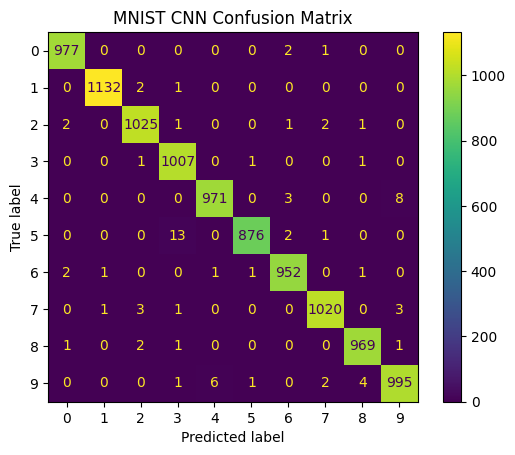

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Lists to store predictions and labels
all_predictions = []
all_labels = []

# Inference loop
cnn_model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass

        # Get the predicted class

        # Append the predictions and labels to the lists
        # Convert to numpy arrays on the CPU before appending
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
confusion_matrix_array = confusion_matrix(all_labels, all_predictions)

# Visualize confusion matrix
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix_array)
confusion_matrix_display.plot()
plt.title("MNIST CNN Confusion Matrix")
plt.show()

## Reflection

Wow! We were able to achieve a loss of around 0.001 and an accuracy of 99% after just 10 epochs. This is a great improvement over the MLP network.

The CNN is a more powerful network architecture for image classification tasks. The CNN is able to learn features from the images and use those features to make predictions. The CNN is able to learn spatial hierarchies of features from the images and "see" features in images in higher dimensions.

### What is the Adam optimizer?

You may have noticed that we used the Adam optimizer in the CNN implementation.

The Adam optimizer is an adaptive learning rate optimization algorithm that is used to update the weights of the network. It is a combination of the RMSprop and AdaGrad algorithms. The Adam optimizer uses the first and second moments of the gradients to update the weights of the network. The Adam optimizer is a popular optimization algorithm for training neural networks because it is computationally efficient and has been shown to converge faster than other optimization algorithms.

## Next Steps

Congratulations on building your first neural networks! You've learned a lot in this project. You've learned how to build a simple neural network from scratch, how to use the PyTorch library to build and train a neural network, and how to build a more-modern convolutional neural network (CNN) using PyTorch.

Let's continue learning in the next project!